(statistics)=

# Statistics in Python

**Author**: _Gaël Varoquaux_

:::{admonition} Requirements

- Standard scientific Python environment (NumPy, SciPy, matplotlib)
- [Pandas](https://pandas.pydata.org/)
- [Statsmodels](https://www.statsmodels.org/)
- [Seaborn](https://seaborn.pydata.org)

To install Python and these dependencies, we recommend that you
download [Anaconda Python](https://www.anaconda.com/distribution/) or,
preferably, use the package manager if you are under Ubuntu or other linux.
:::

:::{admonition} See also

- **Bayesian statistics in Python**:
  This chapter does not cover tools for Bayesian statistics. Of
  particular interest for Bayesian modelling is [PyMC](https://docs.pymc.io/), which implements a probabilistic
  programming language in Python.
- **Read a statistics book**:
  The [Think stats](https://greenteapress.com/wp/think-stats-2e) book is
  available as free PDF or in print and is a great introduction to
  statistics.
  :::

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

::: {note}
:class: dropdown

**Why Python for statistics?**

R is a language dedicated to statistics. Python is a general-purpose
language with statistics modules. R has more statistical analysis
features than Python, and specialized syntaxes. However, when it
comes to building complex analysis pipelines that mix statistics with
e.g. image analysis, text mining, or control of a physical
experiment, the richness of Python is an invaluable asset.
:::

::: {note}
:class: dropdown

In this document, the Python inputs are represented with the sign
">>>".

**Disclaimer: Gender questions**

Some of the examples of this tutorial are chosen around gender
questions. The reason is that on such questions controlling the truth
of a claim actually matters to many people.
:::

## Data representation and interaction

### Data as a table

The setting that we consider for statistical analysis is that of multiple
_observations_ or _samples_ described by a set of different _attributes_
or _features_. The data can than be seen as a 2D table, or matrix, with
columns giving the different attributes of the data, and rows the
observations. For instance, the data contained in
{download}`examples/brain_size.csv`:

:::{include} examples/brain_size.csv
:literal:
:end-line: 6
:::

### The pandas data-frame

::: {note}
:class: dropdown

We will store and manipulate this data in a {class}`pandas.DataFrame`, from
the [pandas](https://pandas.pydata.org) module. It is the Python equivalent of
the spreadsheet table. It is different from a 2D `numpy` array as it has named
columns, can contain a mixture of different data types by column, and has
elaborate selection and pivotal mechanisms.

:::

#### Creating dataframes: reading data files or converting arrays

:::{sidebar} Separator
It is a CSV file, but the separator is ";"
:::

**Reading from a CSV file:** Using the above CSV file that gives
observations of brain size and weight and IQ (Willerman et al. 1991), the
data are a mixture of numerical and categorical values:

In [2]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".", index_col=0)
data

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545
6,Female,99,90,110,146.0,69.0,928799
7,Female,138,136,131,138.0,64.5,991305
8,Female,92,90,98,175.0,66.0,854258
9,Male,89,93,84,134.0,66.3,904858
10,Male,133,114,147,172.0,68.8,955466


:::{warning}
**Missing values**

The weight of the second individual is missing in the CSV file. If we
don't specify the missing value (NA = not available) marker, we will
not be able to do statistical analysis.
:::

**Creating from arrays**: A {class}`pandas.DataFrame` can also be seen
as a dictionary of 1D 'series', eg arrays or lists. If we have 3
`numpy` arrays:

In [3]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

We can expose them as a `pd.DataFrame`

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


**Other inputs**: [pandas](https://pandas.pydata.org) can input data from
SQL, excel files, or other formats. See the [pandas documentation](https://pandas.pydata.org).

#### Manipulating data

`data` is a {class}`pandas.DataFrame`, that resembles R's dataframe:

In [5]:
data.shape    # 40 rows and 8 columns

(40, 7)

In [6]:
data.columns  # It has columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [7]:
data['Gender']  # Columns can be addressed by name

1     Female
2       Male
3       Male
4       Male
5     Female
6     Female
7     Female
8     Female
9       Male
10      Male
11    Female
12      Male
13      Male
14    Female
15    Female
16    Female
17    Female
18      Male
19    Female
20      Male
21      Male
22      Male
23    Female
24      Male
25    Female
26      Male
27    Female
28      Male
29    Female
30    Female
31    Female
32      Male
33      Male
34      Male
35    Female
36    Female
37      Male
38    Female
39      Male
40      Male
Name: Gender, dtype: object

In [8]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

:::{note}
For a quick view on a large dataframe, use its `describe`
method: {meth}`pandas.DataFrame.describe`.
:::

**groupby**: splitting a dataframe on values of categorical variables:

In [9]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


`groupby_gender` is a powerful object that exposes many
operations on the resulting group of dataframes:

In [10]:
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


::: {note}
:class: dropdown

Use tab-completion on `groupby_gender` to find more. Other common
grouping functions are median, count (useful for checking to see the
amount of missing values in different subsets) or sum. Groupby
evaluation is lazy, no work is done until an aggregation function is
applied.
:::

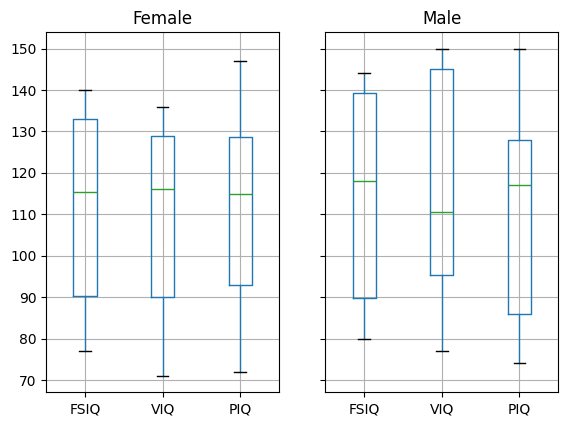

In [11]:
data = pd.read_csv("examples/brain_size.csv", sep=";", na_values=".")

# Box plots of different columns for each gender
groupby_gender = data.groupby("Gender")
groupby_gender.boxplot(column=["FSIQ", "VIQ", "PIQ"]);

::: {exercise-start}
:label: stats-brain-basic
:class: dropdown
:::

- What is the mean value for VIQ for the full population?

- How many males/females were included in this study?

  **Hint** use 'tab completion' to find out the methods that can be
  called, instead of 'mean' in the above example.

- What is the average value of MRI counts expressed in log units, for
  males and females?

:::{note}
`groupby_gender.boxplot` is used for the plots above (see the plot code
above).
:::

::: {exercise-end}
:::

#### Plotting data

Pandas comes with some plotting tools ({mod}`pandas.plotting`, using
matplotlib behind the scene) to display statistics of the data in
dataframes:

**Scatter matrices**:

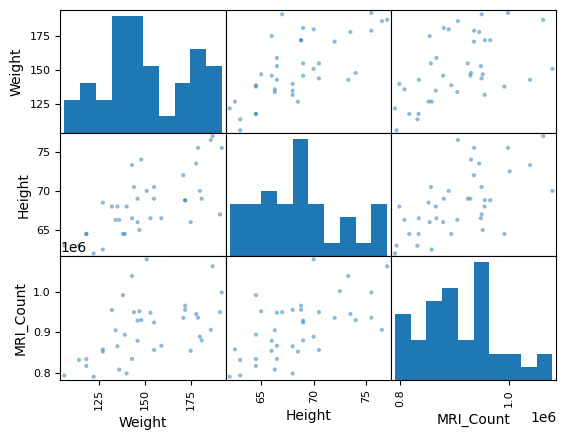

In [12]:
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

:::{sidebar} Two populations
The IQ metrics are bimodal, as if there are 2 sub-populations.
:::

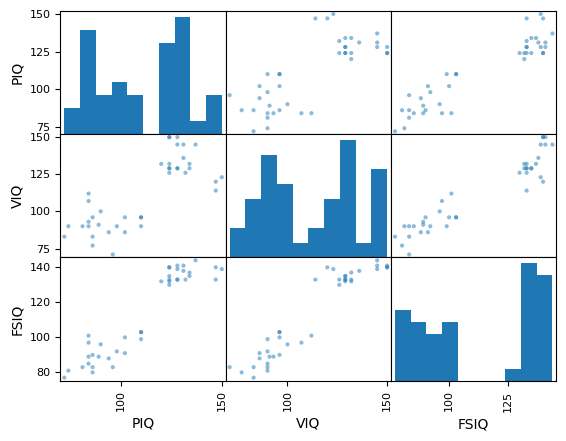

In [13]:
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

::: {exercise-start}
:label: stats-bimodel-ex
:class: dropdown
:::

Plot the scatter matrix for males only, and for females only. Do you
think that the 2 sub-populations correspond to gender?

::: {exercise-end}
:::

## Hypothesis testing: comparing two groups

For simple [statistical tests](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), we will
use the {mod}`scipy.stats` sub-module of [SciPy](https://docs.scipy.org/doc/):

In [14]:
import scipy as sp

:::{admonition} See also

SciPy is a vast library. For a quick summary to the whole library, see
the {ref}`scipy <scipy>` chapter.
:::

### Student's t-test: the simplest statistical test

#### One-sample tests: testing the value of a population mean

![](two_sided.png)

{func}`scipy.stats.ttest_1samp` tests the null hypothesis that the mean
of the population underlying the data is equal to a given value. It returns
the [T statistic](https://en.wikipedia.org/wiki/Student%27s_t-test),
and the [p-value](https://en.wikipedia.org/wiki/P-value) (see the
function's help):

In [15]:
sp.stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727975e-28), df=np.int64(39))

The p-value of $10^-28$ indicates that such an extreme value of the statistic
is unlikely to be observed under the null hypothesis. This may be taken as
evidence that the null hypothesis is false and that the population mean IQ
(VIQ measure) is not 0.

Technically, the p-value of the t-test is derived under the assumption that
the means of samples drawn from the population are normally distributed.
This condition is exactly satisfied when the population itself is normally
distributed; however, due to the central limit theorem, the condition is
nearly true for reasonably large samples drawn from populations that follow
a variety of non-normal distributions.

Nonetheless, if we are concerned that violation of the normality assumptions
will affect the conclusions of the test, we can use a [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), which relaxes
this assumption at the expense of test power:

In [16]:
sp.stats.wilcoxon(data['VIQ'])

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(3.488172636231201e-08))

#### Two-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female samples
were different. To test whether this difference is significant (and
suggests that there is a difference in population means), we perform
a two-sample t-test using {func}`scipy.stats.ttest_ind`:

In [17]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
sp.stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

The corresponding non-parametric test is the [Mann–Whitney U
test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U),
{func}`scipy.stats.mannwhitneyu`.

In [18]:
sp.stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=np.float64(164.5), pvalue=np.float64(0.3422886868727315))

### Paired tests: repeated measurements on the same individuals

<Axes: >

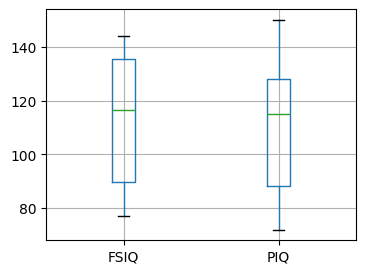

In [19]:
# Box plot of FSIQ and PIQ (different measures of IQ)
plt.figure(figsize=(4, 3))
data.boxplot(column=["FSIQ", "PIQ"])

PIQ, VIQ, and FSIQ give three measures of IQ. Let us test whether FISQ and PIQ
are significantly different. We can use an "independent sample" test:

In [20]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

The problem with this approach is that it ignores an important relationship
between observations: FSIQ and PIQ are measured on the same individuals. Thus,
the variance due to inter-subject variability is confounding, reducing the
power of the test. This variability can be removed using a "paired test" or
["repeated measures
test"](https://en.wikipedia.org/wiki/Repeated_measures_design):

In [21]:
sp.stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

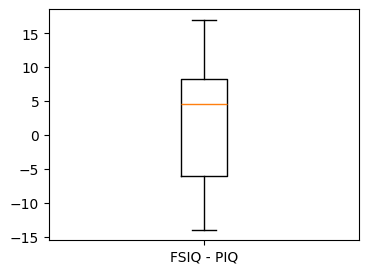

In [22]:
# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data["FSIQ"] - data["PIQ"])
plt.xticks((1,), ("FSIQ - PIQ",));

This is equivalent to a one-sample test on the differences between paired
observations:

In [23]:
sp.stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

Accordingly, we can perform a nonparametric version of the test with
`wilcoxon`.

In [24]:
sp.stats.wilcoxon(data['FSIQ'], data['PIQ'], method="approx")

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

::: {exercise-start}
:label: stats-weights-ex
:class: dropdown
:::

- Test the difference between weights in males and females.
- Use non parametric statistics to test the difference between VIQ in
  males and females.

::: {exercise-end}
:::

::: {solution-start} stats-weights-ex
:class: dropdown
:::

**Conclusion**: we find that the data does not support the hypothesis
that males and females have different VIQ.

::: {solution-end}
:::

## Linear models, multiple factors, and analysis of variance

### "formulas" to specify statistical models in Python

#### A simple linear regression

::: {note}

From an original example by **Thomas Haslwanter**.

:::

Given two set of observations, `x` and `y`, we want to test the
hypothesis that `y` is a linear function of `x`. In other terms:

$$
y = x * \textit{coef} + \textit{intercept} + e
$$

where $e$ is observation noise. We will use the [statsmodels](https://www.statsmodels.org/) module to:

1. Fit a linear model. We will use the simplest strategy, [ordinary least
   squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS).
2. Test that `coef` is non zero.

First, we generate simulated data according to the model:

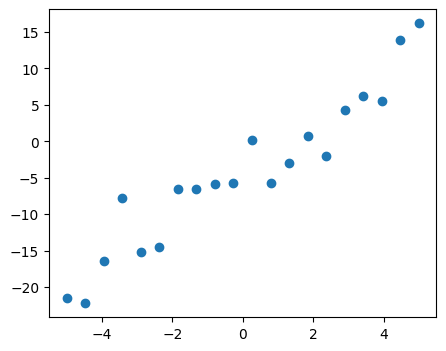

In [25]:
x = np.linspace(-5, 5, 20)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

# normal distributed noise
y = -5 + 3 * x + 4 * rng.normal(size=x.shape)

# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, "o");

:::{sidebar} "formulas" for statistics in Python
[See the statsmodels documentation](https://www.statsmodels.org/stable/example_formulas.html)
:::

Then we specify an OLS model and fit it:

In [26]:
import statsmodels.formula.api as smf
model = smf.ols("y ~ x", data).fit()

We can inspect the various statistics derived from the fit:

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     164.5
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.72e-10
Time:                        22:24:36   Log-Likelihood:                -51.758
No. Observations:                  20   AIC:                             107.5
Df Residuals:                      18   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2948      0.759     -5.661      0.000      -5.889      -2.701
x              3.2060      0.250     12.825      0.000       2.681       3.731
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.999
Skew:                           0.503   Prob(JB):                        0.607
Kurtosis:                       2.568   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

:::{admonition} Terminology:
Statsmodels uses a statistical terminology: the `y` variable in
statsmodels is called 'endogenous' while the `x` variable is called
exogenous. This is discussed in more detail [here](https://www.statsmodels.org/devel/endog_exog.html).

To simplify, `y` (endogenous) is the value you are trying to predict,
while `x` (exogenous) represents the features you are using to make
the prediction.

If the terminology is unfamiliar, you might be able to remember which way
round these go by noticing that there is an `x` in exogenous.
:::

::: {exercise-start}
:label: stats-estimated-params-ex
:class: dropdown
:::

Retrieve the estimated parameters from the model above.

**Hint**: use tab-completion to find the relevant attribute.

::: {exercise-end}
:::

#### Categorical variables: comparing groups or multiple categories

Let us go back the data on brain size:

In [28]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")

We can write a comparison between IQ of male and female using a linear
model:

In [29]:
model = smf.ols("VIQ ~ Gender + 1", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 29 Sep 2025   Prob (F-statistic):              0.445
Time:                        22:24:36   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000      98.704     120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

::::{admonition} Tips on specifying models

**Forcing categorical**: the 'Gender' is automatically detected as a
categorical variable, and thus each of its different values are
treated as different entities.

An integer column can be forced to be treated as categorical using:

```python
model = ols('VIQ ~ C(Gender)', data).fit()
```

**Intercept**: We can remove the intercept using `- 1` in the formula,
or force the use of an intercept using `+ 1`.

::: {note}
:class: dropdown

By default, statsmodels treats a categorical variable with K possible
values as K-1 'dummy' boolean variables (the last level being
absorbed into the intercept term). This is almost always a good
default choice - however, it is possible to specify different
encodings for categorical variables
(<https://www.statsmodels.org/devel/contrasts.html>).
:::
::::

#### Link to t-tests between different FSIQ and PIQ

To compare different types of IQ, we need to create a "long-form"
table, listing IQs, where the type of IQ is indicated by a
categorical variable:

In [30]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
data_long

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq
...,...,...
35,128,piq
36,124,piq
37,94,piq
38,74,piq


In [31]:
model = smf.ols("iq ~ type", data_long).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Mon, 29 Sep 2025   Prob (F-statistic):              0.643
Time:                        22:24:36   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      0.000     106.119     120.781
type[T.piq]    -2.4250      5.208     -0.466      0.643     -12.793       7.943
==============================================================================
Omnibus:                      164.598   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.062
Skew:                          -0.110   Prob(JB):                       0.0178
Kurtosis:                       1.461   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that we retrieve the same values for t-test and
corresponding p-values for the effect of the type of iq than the
previous t-test:

In [32]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### Multiple Regression: including multiple factors

::: {note}

From an original example by _Thomas Haslwanter_

:::

Consider a linear model explaining a variable `z` (the dependent
variable) with 2 variables `x` and `y`:

$$
z = x \, c_1 + y \, c_2 + i + e
$$

Such a model can be seen in 3D as fitting a plane to a cloud of (`x`, `y`,
`z`) points.

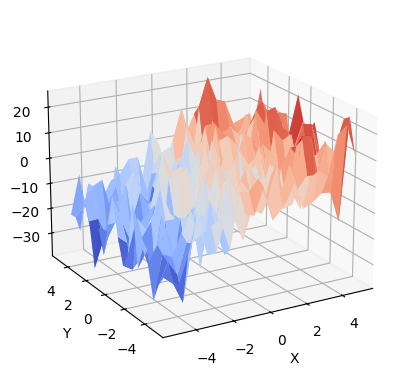

In [33]:
# Generate and show the data
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

# Z is the elevation of this 2D grid
Z = -5 + 3 * X - 0.5 * Y + 8 * rng.normal(size=X.shape)

# Plot the data
ax = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

**Example: the iris data** ({download}`examples/iris.csv`)

::: {note}
:class: dropdown

Sepal and petal size tend to be related: bigger flowers are bigger!
But is there in addition a systematic effect of species?
:::

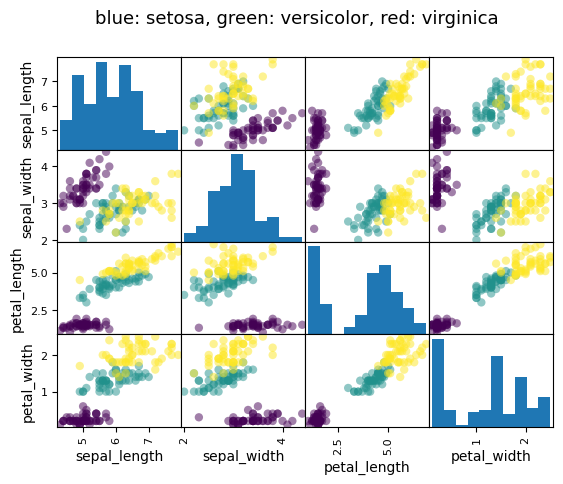

In [34]:
data = pd.read_csv('examples/iris.csv')
# Express the names as categories
categories = pd.Categorical(data["name"])
# The parameter 'c' is passed to plt.scatter and will control the color
pd.plotting.scatter_matrix(data, c=categories.codes, marker="o")
fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13);

Let us try to explain the sepal length as a function of the petal
width and the category of iris

In [35]:
model = smf.ols("sepal_width ~ name + petal_length", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.58e-20
Time:                        22:24:37   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000       2.785       3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000      -1.840      -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000      -2.169      -1.158
petal_length           0.2983      0.061      4.920      0.000       0.178       0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Post-hoc hypothesis testing: analysis of variance (ANOVA)

In the above iris example, we wish to test if the petal length is
different between versicolor and virginica, after removing the effect of
sepal width. This can be formulated as testing the difference between the
coefficient associated to versicolor and virginica in the linear model
estimated above (it is an Analysis of Variance, [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)). For this, we
write a **vector of 'contrast'** on the parameters estimated: we want to
test `"name[T.versicolor] - name[T.virginica]"`, with an [F-test](https://en.wikipedia.org/wiki/F-test):

In [36]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465741523, p=0.07369058781701222, df_denom=146, df_num=1>


Is this difference significant?

::: {exercise-start}
:label: stats-male-female-ex
:class: dropdown
:::

Going back to the brain size + IQ data, test if the VIQ of male and
female are different after removing the effect of brain size, height
and weight.

::: {exercise-end}
:::

## More visualization: Seaborn for statistical exploration

[Seaborn](https://seaborn.pydata.org) combines
simple statistical fits with plotting on pandas dataframes.

In [37]:
import seaborn

Let us consider a data giving wages and many other personal information
on 500 individuals ([Berndt, ER. The Practice of Econometrics. 1991. NY:
Addison-Wesley](https://lib.stat.cmu.edu/datasets/CPS_85_Wages)).

We first load and arrange the data — view the code for details:

In [38]:
data = pd.read_csv("examples/wages.txt",
    skiprows=27,
    skipfooter=6,
    sep=None,
    header=None,
    engine="python"  # To allow use of skipfooter.
)
# Give names to the columns
names = [
    "education: Number of years of education",
    "south: 1=person lives in South, 0=Person lives elsewhere",
    "sex: 1=female, 0=Male",
    "experience: Number of years of work experience",
    "union: 1=union member, 0=Not union member",
    "wage: wage (dollars per hour)",
    "age: years",
    "race: 1=other, 2=Hispanic, 3=White",
    "occupation: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "sector: 0=Other, 1=Manufacturing, 2=Construction",
    "marr: 0=unmarried,  1=Married",
]
short_names = [n.split(":")[0] for n in names]
data.columns = pd.Index(short_names)
# Log-transform the wages, because they typically are increased with
# multiplicative factors
data["wage"] = np.log10(data["wage"])
# Convert genders to strings (this is particularly useful so that the
# statsmodels formulas detects that `sex` is a categorical variable)
data["sex"] = np.choose(data['sex'], ["male", "female"])

Here are the resulting loaded data.

In [39]:
data

,education,south,sex,experience,union,wage,age,race,occupation,sector,marr
0,8,0,female,21,0,0.707570,35,2,6,1,1
1,9,0,female,42,0,0.694605,57,3,6,1,1
2,12,0,male,1,0,0.824126,19,3,6,1,0
3,12,0,male,4,0,0.602060,22,3,6,0,0
4,12,0,male,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,male,5,0,1.055378,29,3,5,0,0
530,12,0,female,33,0,0.785330,51,1,5,0,1
531,17,0,female,25,1,1.366423,48,1,5,0,1
532,12,1,male,13,1,1.298416,31,3,5,0,1


### Pairplot: scatter matrices

We can easily have an intuition on the interactions between continuous
variables using {func}`seaborn.pairplot` to display a scatter matrix:

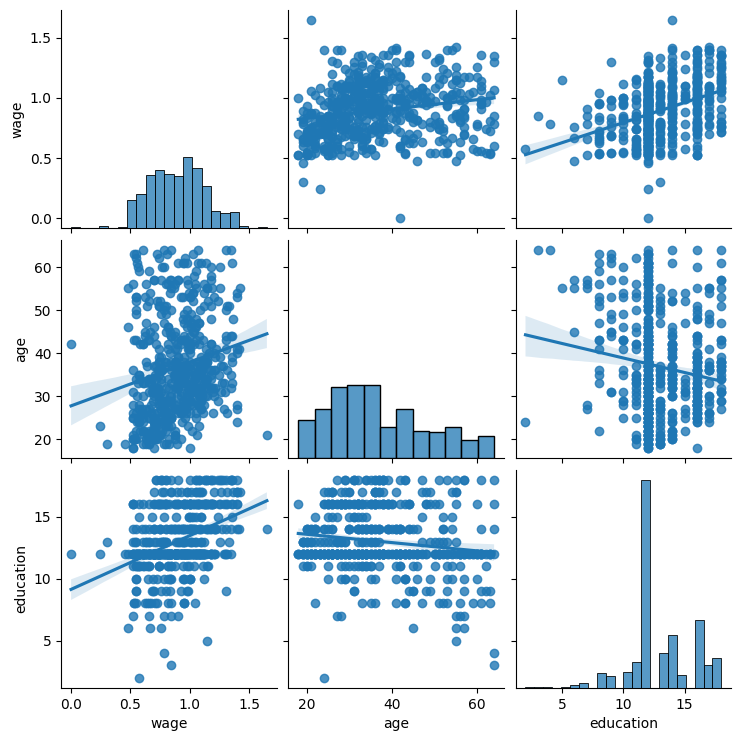

In [40]:
seaborn.pairplot(data, vars=['wage', 'age', 'education'], kind='reg');

Categorical variables can be plotted as the hue:

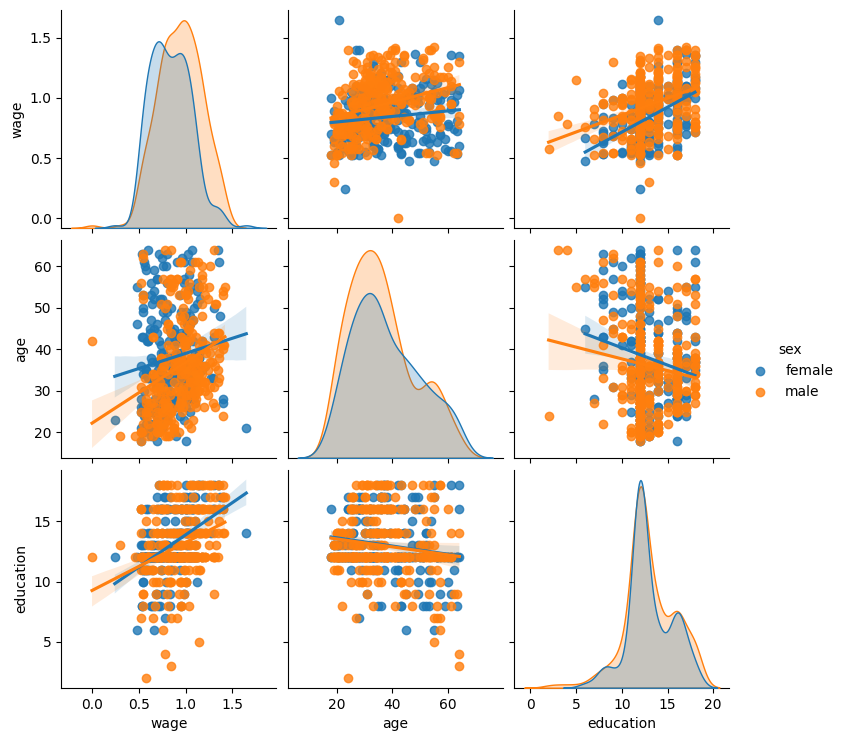

In [41]:
seaborn.pairplot(data, vars=['wage', 'age', 'education'],
                 kind='reg', hue='sex');

::::{topic} **Look and feel and matplotlib settings**
Seaborn changes the default of matplotlib figures to achieve a more
"modern", "excel-like" look. It does that upon import. You can reset
the default using:

```python
plt.rcdefaults()
```

::: {note}
:class: dropdown

To switch back to seaborn settings, or understand better styling in
seaborn, see the [relevant section of the seaborn documentation](https://seaborn.pydata.org/tutorial/aesthetics.html).
:::

::::

### lmplot: plotting a univariate regression

A regression capturing the relation between one variable and another, eg
wage, and education, can be plotted using {func}`seaborn.lmplot`:

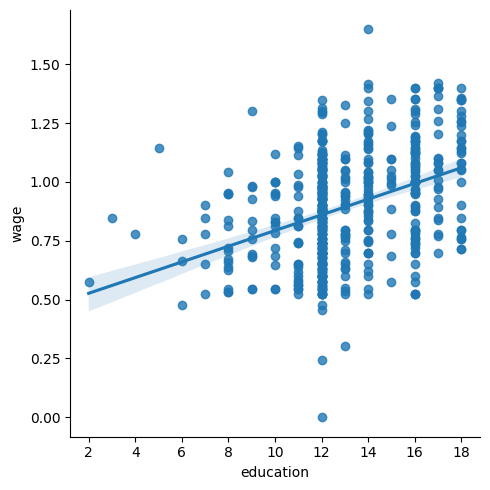

In [42]:
seaborn.lmplot(y='wage', x='education', data=data);

::::{topic} **Robust regression**

::: {note}
:class: dropdown

Given that, in the above plot, there seems to be a couple of data
points that are outside of the main cloud to the right, they might be
outliers, not representative of the population, but driving the
regression.

:::

To compute a regression that is less sensitive to outliers, one must use
a [robust model](https://en.wikipedia.org/wiki/Robust_statistics). This is
done in seaborn using `robust=True` in the plotting functions, or in
statsmodels by replacing the use of the OLS by a "Robust Linear Model",
{func}`statsmodels.formula.api.rlm`. ::::

## Testing for interactions

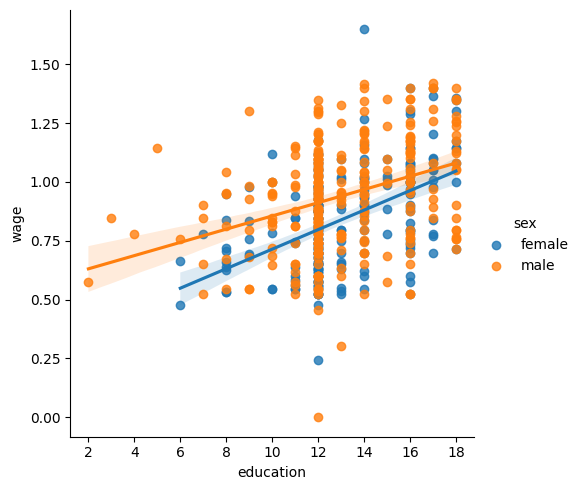

In [43]:
seaborn.lmplot(y="wage", x="education", hue="sex", data=data);

We can first ask do `education` and `sex` separately contribute to `wage`:

In [44]:
result = smf.ols(formula="wage ~ education + sex", data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.01e-25
Time:                        22:24:40   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4053      0.046      8.732      0.000       0.314       0.496
sex[T.male]     0.1008      0.018      5.625      0.000       0.066       0.136
education       0.0334      0.003      9.768      0.000       0.027       0.040
==============================================================================
Omnibus:                        4.675   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.876
Skew:                          -0.147   Prob(JB):                       0.0873
Kurtosis:                       3.365   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our next question is — do wages _increase more_ with education for males than
females?

::: {note}
:class: dropdown

The plot above is made of two different fits. We need to formulate a
single model that tests for a variance of slope across the two
populations. This is done via an ["interaction"](https://www.statsmodels.org/devel/example_formulas.html#multiplicative-interactions).
:::

In [45]:
result = smf.ols(formula='wage ~ education + sex + education * sex',
                 data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.94e-25
Time:                        22:24:40   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2998      0.072      4.173      0.000       0.159       0.441
sex[T.male]               0.2750      0.093      2.972      0.003       0.093       0.457
education                 0.0415      0.005      7.647      0.000       0.031       0.052
education:sex[T.male]    -0.0134      0.007     -1.919      0.056      -0.027       0.000
==============================================================================
Omnibus:                        4.838   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.000
Skew:                          -0.156   Prob(JB):                       0.0821
Kurtosis:                       3.356   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can we conclude that education benefits males more than females?

:::{admonition} Take home messages

- Hypothesis testing and p-values give you the **significance** of an
  effect / difference.
- **Formulas** (with categorical variables) enable you to express rich
  links in your data.
- **Visualizing** your data and fitting simple models give insight into the
  data.
- **Conditionning** (adding factors that can explain all or part of
  the variation) is an important modeling aspect that changes the
  interpretation.
  :::